# Code Assigment 1

##Abraham Guerrero Julio

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


In [ ]:
# Importación de paquetes
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from google.colab import drive
style.use('ggplot')

In [ ]:

# lectura base de datos 

# Primer data set
a = pd.read_csv('/content/drive/Shareddrives/Python universe/DATA/1datatest2.txt', sep = ",") #estamos trabajando con archivos separados por comas
a1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatest.txt', sep = ",")
a2 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatraining.txt', sep = ",")

# Segundo dataset
b = pd.read_csv('/content/drive/Shareddrives/Python universe/DATA/2data.txt', sep = ",")

Las siguientes lineas se usaron para estimar la data de entrenamiento y la data de testeo del modelo de billetes

In [ ]:
b #visualizar el dataset b

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
filtro1 = b['clasificación']==0
b.loc[filtro1, 'clasificación'] =-1
b

In [ ]:
# Separación de base de entrenamiento y testeo
"""
msk = np.random.rand(len(b)) < 0.8

b1 = b[msk]
bt = b[~msk]
b1.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv')
bt.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv')
"""

"\nmsk = np.random.rand(len(b)) < 0.8\n\nb1 = b[msk]\nbt = b[~msk]\nb1.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv')\nbt.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv')\n"

In [ ]:
b1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv', sep = ",")
bt = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv', sep = ",")

In [ ]:
data = bt

In [ ]:
transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

In [ ]:
#definimos la clase support vector machine
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # Entrenamiento
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # vectores de soporte yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # computacionalmente costoso
        b_range_multiple = 2
        # Tomamos pequeños pasos con w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # Esto es válido debido a la convexidad
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            print(opt_dict)
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()

In [ ]:
bt

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
1,4.545900,8.16740,-2.45860,-1.462100,-1
3,3.456600,9.52280,-4.01120,-3.594400,-1
5,4.368400,9.67180,-3.96060,-3.162500,-1
7,2.092200,-6.81000,8.46360,-0.602160,-1
10,1.224700,8.77790,-2.21350,-0.806470,-1
...,...,...,...,...,...
1347,-5.385700,9.12140,-0.41929,-5.918100,1
1350,-0.218880,-2.20380,-0.09540,0.564210,1
1351,1.318300,1.90170,-3.31110,0.065071,1
1359,0.066129,2.49140,-2.94010,-0.621560,1


<Axes: xlabel='clasificación', ylabel='sesgo imagen'>

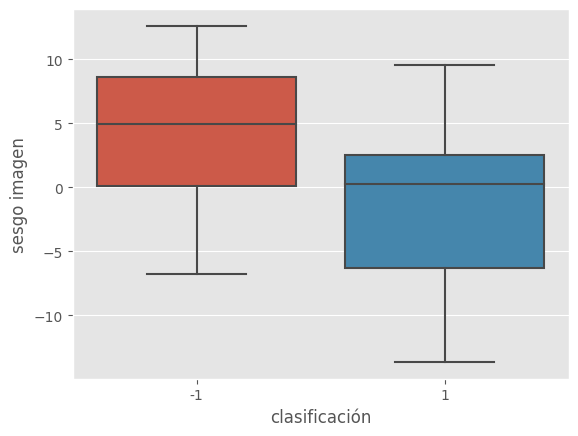

In [ ]:
sns.boxplot(x='clasificación', y='sesgo imagen', data=bt)

<Axes: xlabel='clasificación', ylabel='curtosis'>

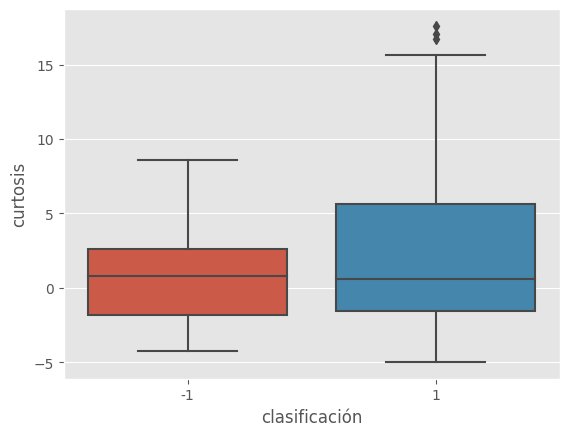

In [ ]:
sns.boxplot(x='clasificación', y='curtosis', data=bt)

<Axes: xlabel='clasificación', ylabel='entropias'>

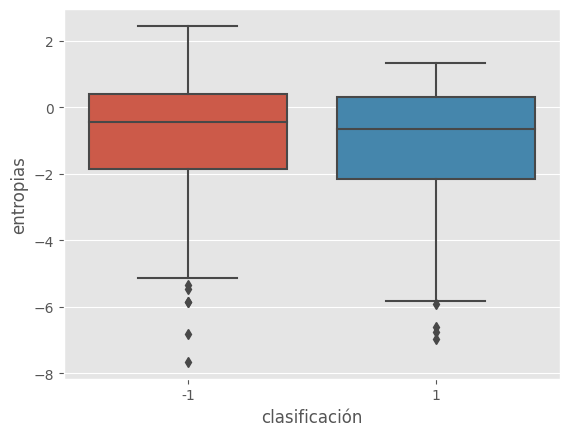

In [ ]:
sns.boxplot(x='clasificación', y='entropias', data=bt)


In [ ]:
b_11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_1Y = b1[["clasificación"]]
#,"curtosis","entropias"

In [ ]:
b_11

,varianza imagen,sesgo imagen,curtosis,entropias
0,3.62160,8.6661,-2.80730,-0.44699
2,3.86600,-2.6383,1.92420,0.10645
4,0.32924,-4.4552,4.57180,-0.98880
6,3.59120,3.0129,0.72888,0.56421
8,3.20320,5.7588,-0.75345,-0.61251
...,...,...,...,...
1366,-2.41000,3.7433,-0.40215,-1.29530
1367,0.40614,1.3492,-1.45010,-0.55949
1368,-1.38870,-4.8773,6.47740,0.34179
1369,-3.75030,-13.4586,17.59320,-2.77710


In [ ]:
b_2 = b.loc[b['clasificación']==-1]
b_22 = b_2[["varianza imagen","sesgo imagen"]]
b_22

,varianza imagen,sesgo imagen
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
757,2.66060,3.16810
758,3.93100,1.85410
759,0.01727,8.69300
760,3.24140,0.40971


In [ ]:
b_11 = b_11.to_numpy()
b_22 = b_22.to_numpy()

In [ ]:
b_22

array([[ 3.6216 ,  8.6661 ],
       [ 4.5459 ,  8.1674 ],
       [ 3.866  , -2.6383 ],
       ...,
       [ 0.01727,  8.693  ],
       [ 3.2414 ,  0.40971],
       [ 2.2504 ,  3.5757 ]])

la herramienta no logra optimizar


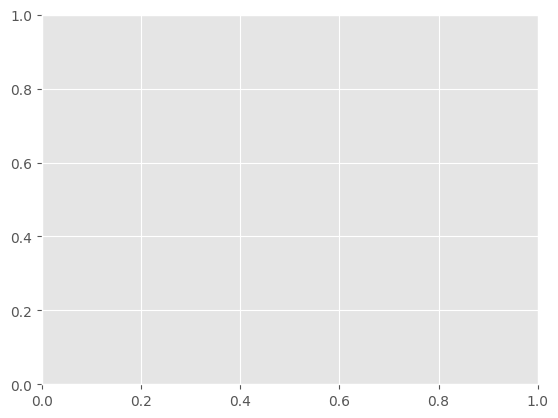

In [ ]:
try:
  import matplotlib.pyplot as plt
  data_dict = {-1:b_11, 1:b_22}
  svm1 = Support_Vector_Machine()
  svm1.fit(data_dict)
except:
  print("la herramienta no logra optimizar")

# Resolución de preguntas


**1 ¿qué problema de machine learning estamos resolviendo?**

En este caso deseamos trabajar un problema de clasificación.

**2 Caracteristicas y etiquetas**

In [ ]:
b1.describe()

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.00000
mean,0.451272,1.993999,1.380482,-1.223889,-0.10646
std,2.848932,5.854436,4.317721,2.146508,0.99477
min,-7.042100,-13.773100,-5.286100,-8.548200,-1.00000
25%,-1.764800,-1.400900,-1.505350,-2.534050,-1.00000
50%,0.519500,2.406600,0.553230,-0.586650,-1.00000
75%,2.814650,6.819300,3.146050,0.400630,1.00000
max,6.824800,12.951600,17.927400,2.162500,1.00000


**3.A) son linealmente separables**

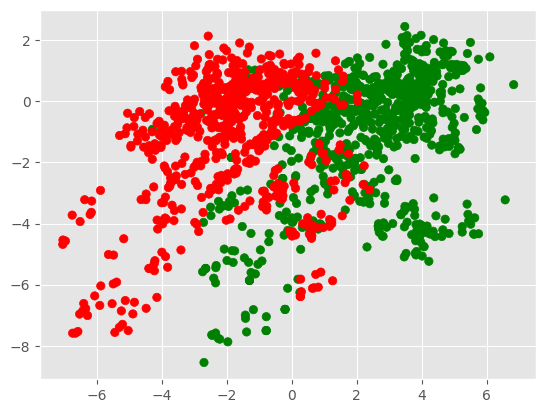

In [ ]:
fig, ax = plt.subplots()
colors = {1:'red', -1:'green'}
ax.scatter(b['varianza imagen'], b['entropias'], c=b['clasificación'].map(colors))

plt.show()

**3.B) Son estos datos aleatoriamente escogidos**

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

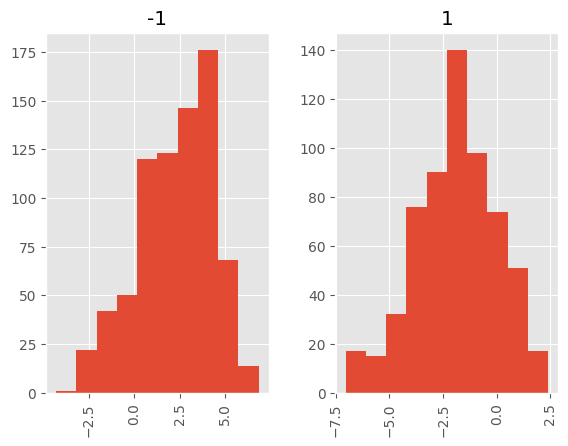

In [ ]:
b['varianza imagen'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

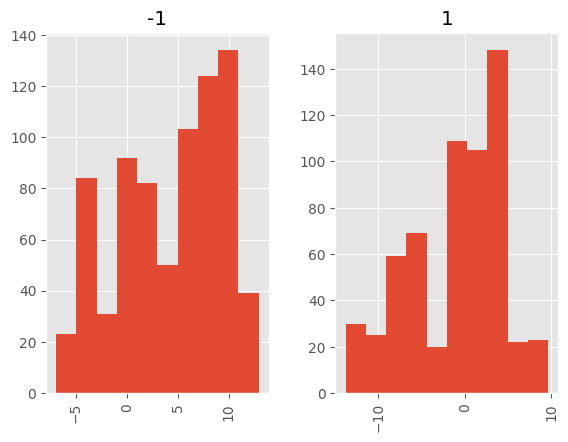

In [ ]:
b['sesgo imagen'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

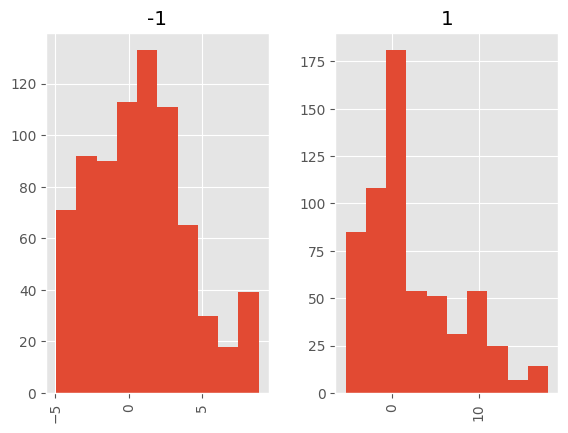

In [ ]:
b['curtosis'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

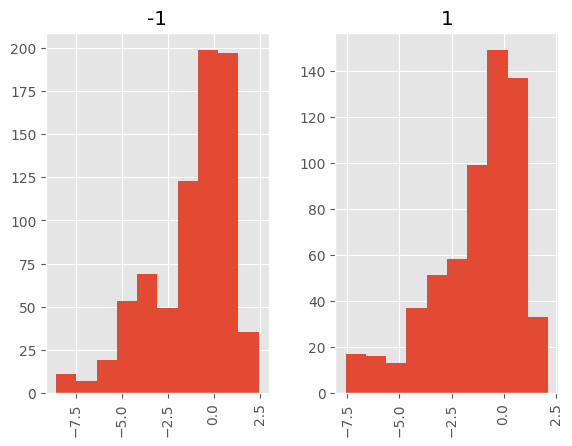

In [ ]:
b['entropias'].hist(by=b['clasificación'])

**3.C) El tamaño de la muestra garantiza generalización**


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


In [ ]:
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
print(clf.named_steps['linearsvc'].coef_)

[[-2.41976081 -2.71182082 -2.44746842  0.0221678 ]]


In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)

In [ ]:
ypredict

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
list_2 = ypredict.tolist()
print(list_2)

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
list_1 = bt["clasificación"].values.tolist()
print(list_1)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})

5. texteo con datos generalizados

In [ ]:
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


#Generalización

In [ ]:
# Calificación del modelo por medio de métricas

def metricas_cal(data):
  df2 = len(data[data["resultado"]=="acerto"])
  #print(df2)
  df3 = len(data[data["resultado"]=="no acerto"])
  #print(df2)
  total = df2+df3
  # precisión
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('la exactitud del spv es de: '+a+'%')
  
  # verdaderos negativos
  df2 = len(data[(data["valor_verdadero"]==-1) & (data["valor_estimado"]==-1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos negativos son '+a+'% de la población de testeo ')
  # falsos negativo
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==-1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos negativos son '+a+'% de la población de testeo ')
  # falsos positivos
  df2 = len(data[(data["valor_verdadero"]==-1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos positivos son '+a+'% de la población de testeo ')
  # verdaderos positivos
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos positivos son '+a+'% de la población de testeo ')


In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 97.802%
los valores verdaderos negativos son 54.579% de la población de testeo 
los valores falsos negativos son 0.366% de la población de testeo 
los valores falsos positivos son 1.832% de la población de testeo 
los valores verdaderos positivos son 43.223% de la población de testeo 


# Otros algoritmos de aprendizaje

##**SVM**
 

In [ ]:
from sklearn import svm
from sklearn.metrics import hinge_loss
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, loss="hinge"))
clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(loss='hinge', random_state=0, tol=1e-05))])

In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)
ypredict

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1

In [ ]:
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


##**Regresión lineal**

In [ ]:
from sklearn.linear_model import LinearRegression
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
reg = LinearRegression().fit(X, y)
reg
print(reg.coef_)
print(reg.intercept_)

[-0.28637173 -0.15644611 -0.20474641  0.00099835]
0.618595081670794


In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = reg.predict(Xtest)
ypredict

array([-1.45905031, -1.04339216, -1.33774535, -0.64864665, -0.65299168,
       -1.15045584,  0.28427345, -0.28700614, -0.71584515, -0.75764953,
       -0.75081765, -1.04681377, -1.11614032, -0.57174609, -1.17624875,
       -1.1972617 , -0.85164787, -0.91737197, -1.56349014, -0.43057669,
       -1.36871371, -0.84758494,  0.25597832, -1.28391856, -1.01274571,
       -0.75299787, -0.71280233, -0.47514507, -1.61650671, -0.78894795,
       -0.73534238, -1.56914257, -0.80589065, -0.70412181, -0.83323317,
       -0.71440395, -1.34099162, -0.57680896, -0.85909959, -0.51770144,
       -0.96757886, -0.98059547, -0.37039777, -0.00451547, -1.08137584,
       -0.01671706, -1.16168242, -0.69626756, -0.56021062, -0.79961727,
       -1.35467957, -0.77313662, -1.17062856, -0.9447745 , -0.01671706,
       -0.85338112, -1.31046347, -0.92164418, -0.83111138, -0.08213987,
       -0.23420965, -1.43642499, -0.85365185, -0.98464348, -0.5849947 ,
       -1.27478899, -0.8826339 ,  0.25597832, -0.80098676,  0.28

In [ ]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
testeo['valor_estimado_exacto'] = testeo['valor_estimado']
filtro2 = testeo['valor_estimado'] > 0
testeo.loc[filtro2, 'valor_estimado'] = 1
filtro2 = testeo['valor_estimado'] <= 0
testeo.loc[filtro2, 'valor_estimado'] = -1
testeo

[-1.45905030889806, -1.0433921571645541, -1.3377453498270278, -0.6486466516767245, -0.6529916824441445, -1.150455838932293, 0.2842734528083829, -0.2870061426450585, -0.7158451515062997, -0.7576495256427686, -0.7508176482857382, -1.046813774724931, -1.1161403161938401, -0.5717460874443742, -1.1762487453716433, -1.197261702737618, -0.8516478743205121, -0.9173719695974049, -1.5634901396645104, -0.43057669044243785, -1.3687137071220277, -0.8475849444264897, 0.25597832448044233, -1.2839185561894855, -1.012745708126079, -0.752997865727156, -0.7128023262210407, -0.47514507359055214, -1.6165067125186336, -0.7889479524795299, -0.7353423759049712, -1.569142565718375, -0.8058906477799438, -0.7041218053957553, -0.8332331709976281, -0.7144039543881896, -1.340991618575242, -0.576808961392881, -0.8590995905187987, -0.5177014407672845, -0.9675788577383942, -0.9805954699938372, -0.3703977674963981, -0.0045154710925008334, -1.0813758378772418, -0.01671705589103567, -1.1616824167803697, -0.69626755857755

,valor_verdadero,valor_estimado,valor_estimado_exacto
0,-1,-1.0,-1.459050
1,-1,-1.0,-1.043392
2,-1,-1.0,-1.337745
3,-1,-1.0,-0.648647
4,-1,-1.0,-0.652992
...,...,...,...
268,1,1.0,0.813840
269,1,1.0,1.046148
270,1,1.0,0.621558
271,1,1.0,0.811242


In [ ]:
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,valor_estimado_exacto,resultado
0,-1,-1.0,-1.459050,acerto
1,-1,-1.0,-1.043392,acerto
2,-1,-1.0,-1.337745,acerto
3,-1,-1.0,-0.648647,acerto
4,-1,-1.0,-0.652992,acerto
...,...,...,...,...
268,1,1.0,0.813840,acerto
269,1,1.0,1.046148,acerto
270,1,1.0,0.621558,acerto
271,1,1.0,0.811242,acerto


In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 96.337%
los valores verdaderos negativos son 52.747% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 3.663% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


##**Regresión logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
lreg = LogisticRegression(random_state=0).fit(X, y)
lreg
print(lreg.coef_)
print(lreg.intercept_)

[[-3.18302249 -1.72853826 -2.13231394 -0.0193645 ]]
[3.77747199]


In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = lreg.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1,

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 98.535%
los valores verdaderos negativos son 55.311% de la población de testeo 
los valores falsos negativos son 0.366% de la población de testeo 
los valores falsos positivos son 1.099% de la población de testeo 
los valores verdaderos positivos son 43.223% de la población de testeo 


In [ ]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})


[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1,

##**Vecino más cercano**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
neigh = KNeighborsClassifier()
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
neigh = neigh.fit(X, y)

In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = neigh.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 100.0%
los valores verdaderos negativos son 56.41% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 0.0% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


##**ARBOL DE DECISIÓN**

In [ ]:
from sklearn import tree
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
filtro1 = b_test1y['clasificación']==-1
b_test1y.loc[filtro1, 'clasificación'] ='billete bueno'
filtro1 = b_test1y['clasificación']==1
b_test1y.loc[filtro1, 'clasificación'] ='billete falso'
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtest, ytest)
ypredict = clf.predict(Xtest)

<ipython-input-56-bc8ce950b6e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_test1y.loc[filtro1, 'clasificación'] ='billete bueno'
<ipython-input-56-bc8ce950b6e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_test1y.loc[filtro1, 'clasificación'] ='billete falso'


[Text(0.5, 0.9166666666666666, 'x[0] <= 0.274\ngini = 0.492\nsamples = 273\nvalue = [154, 119]'),
 Text(0.3076923076923077, 0.75, 'x[1] <= 6.591\ngini = 0.313\nsamples = 134\nvalue = [26, 108]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[2] <= 4.866\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 69\nvalue = [0, 69]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[1] <= -2.984\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.15384615384615385, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.46153846153846156, 0.5833333333333334, 'x[0] <= -3.596\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.38461538461538464, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5384615384615384, 0.4166666666666667, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.6923076923076923, 0.75, 'x[2] <

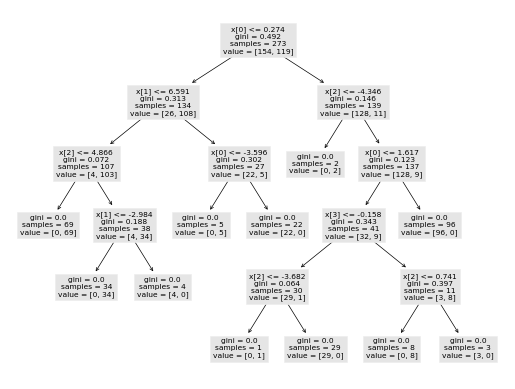

In [ ]:
tree.plot_tree(clf)

In [ ]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro1 = testeo['valor_verdadero']==-1
testeo.loc[filtro1, 'valor_verdadero'] ='billete bueno'
filtro1 = testeo['valor_verdadero']==1
testeo.loc[filtro1, 'valor_verdadero'] ='billete falso'
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
filtro1 = testeo['valor_verdadero']=='billete bueno'
testeo.loc[filtro1, 'valor_verdadero'] =-1
filtro1 = testeo['valor_verdadero']=='billete falso'
testeo.loc[filtro1, 'valor_verdadero'] =1
#valor estimado
filtro1 = testeo['valor_estimado']=='billete bueno'
testeo.loc[filtro1, 'valor_estimado'] =-1
filtro1 = testeo['valor_estimado']=='billete falso'
testeo.loc[filtro1, 'valor_estimado'] =1
testeo

['billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete buen

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 100.0%
los valores verdaderos negativos son 56.41% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 0.0% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


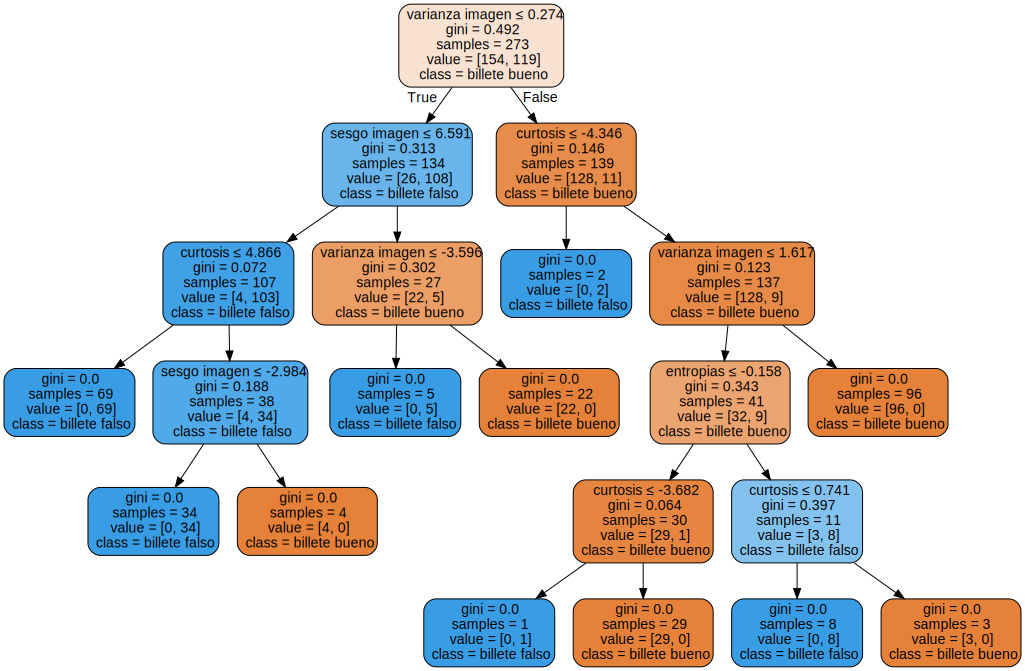

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=b_test11.columns, out_file=None, class_names=clf.classes_,
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
a = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatraining.txt', sep = ",")
a1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatest.txt', sep = ",")
a

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [ ]:
a['date'] = pd.to_datetime(a['date'], format="%Y-%m-%d %H:%M:%S")
a1['date'] = pd.to_datetime(a1['date'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
a['day']= a['date'].dt.day
a['hour']= a['date'].dt.hour
a['minuto']= a['date'].dt.minute

a1['day']= a1['date'].dt.day
a1['hour']= a1['date'].dt.hour
a1['minuto']= a1['date'].dt.minute

In [ ]:
a

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minuto
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,4,17,51
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,4,17,51
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,4,17,53
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,4,17,54
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,4,17,55
...,...,...,...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,10,9,29
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,10,9,29
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,10,9,30
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,10,9,32


In [ ]:
a.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minuto
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,11.390642,29.494290
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,7.092195,17.314343
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,0.000000,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,5.000000,14.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,11.000000,29.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,18.000000,44.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,23.000000,59.000000


##**2.SVM para construir un identificador**

In [ ]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = clf.predict(Xtest)

In [ ]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,valor_verdadero,valor_estimado,resultado
0,1,1,acerto
1,1,1,acerto
2,1,1,acerto
3,1,1,acerto
4,1,1,acerto
...,...,...,...
2660,1,1,acerto
2661,1,1,acerto
2662,1,1,acerto
2663,1,1,acerto


In [ ]:
def metricas_cal(data):
  df2 = len(data[data["resultado"]=="acerto"])
  #print(df2)
  df3 = len(data[data["resultado"]=="no acerto"])
  #print(df2)
  total = df2+df3
  # precisión
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('la exactitud del spv es de: '+a+'%')
  
  # verdaderos negativos
  df2 = len(data[(data["valor_verdadero"]==0) & (data["valor_estimado"]==0)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos negativos son '+a+'% de la población de testeo ')
  # falsos negativo
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==0)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos negativos son '+a+'% de la población de testeo ')
  # falsos positivos
  df2 = len(data[(data["valor_verdadero"]==0) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos positivos son '+a+'% de la población de testeo ')
  # verdaderos positivos
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos positivos son '+a+'% de la población de testeo ')

In [ ]:
metricas_cal(testeo)

la exactitud del spv es de: 97.936%
los valores verdaderos negativos son 61.463% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 2.064% de la población de testeo 
los valores verdaderos positivos son 36.473% de la población de testeo 
